In [34]:
!pip install arch
# 18.01.2023 - 30.04.2024 para ajustar el modelo
# 30.05.2024 - 30.08.2024 Backtest

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model


In [36]:
# Cargar los datos históricos del café
file_path = '/content/Datos históricos Futuros café C EE.UU. (1).csv'
coffee_data = pd.read_csv(file_path)

In [37]:
coffee_data.head()

,Fecha,Último,Apertura,Máximo,Mínimo,Vol.,% var.
0,30.04.2024,"216,65","227,40","227,90","213,40","30,86K","-7,24%"
1,29.04.2024,"233,55","234,00","234,00","234,00","0,02K","4,26%"
2,26.04.2024,"224,00","226,00","226,95","221,35","18,79K","-3,43%"
3,25.04.2024,"231,95","230,85","231,50","230,85","0,03K","1,53%"
4,24.04.2024,"228,45","229,25","229,25","226,35","0,07K","1,76%"


In [38]:
 coffee_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323 entries, 0 to 322
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Fecha     323 non-null    object
 1   Último    323 non-null    object
 2   Apertura  323 non-null    object
 3   Máximo    323 non-null    object
 4   Mínimo    323 non-null    object
 5   Vol.      323 non-null    object
 6   % var.    323 non-null    object
dtypes: object(7)
memory usage: 17.8+ KB


In [39]:
numeric_columns = ['Último', 'Apertura', 'Máximo', 'Mínimo']


for col in numeric_columns:
    coffee_data[col] = coffee_data[col].str.replace(',', '.').astype(float)


coffee_data['Vol.'] = coffee_data['Vol.'].str.replace('K','0').str.replace(',','').astype(float)

coffee_data['% var.'] = coffee_data['% var.'].str.replace('%','').str.replace(',','').astype(float)



coffee_data['Fecha'] = pd.to_datetime(coffee_data['Fecha'], format='%d.%m.%Y')

In [40]:
coffee_data.head()

,Fecha,Último,Apertura,Máximo,Mínimo,Vol.,% var.
0,2024-04-30,216.65,227.40,227.90,213.40,30860.0,-724.0
1,2024-04-29,233.55,234.00,234.00,234.00,20.0,426.0
2,2024-04-26,224.00,226.00,226.95,221.35,18790.0,-343.0
3,2024-04-25,231.95,230.85,231.50,230.85,30.0,153.0
4,2024-04-24,228.45,229.25,229.25,226.35,70.0,176.0


In [41]:
coffee_data.shape

(323, 7)

In [42]:

print("Estadísticas descriptivas:")
print(coffee_data.describe())

Estadísticas descriptivas:
                               Fecha      Último    Apertura      Máximo  \
count                            323  323.000000  323.000000  323.000000   
mean   2023-09-08 05:56:39.380804864  179.374768  178.859288  181.525697   
min              2023-01-18 00:00:00  145.400000  145.400000  146.800000   
25%              2023-05-13 12:00:00  163.075000  162.950000  165.500000   
50%              2023-09-08 00:00:00  182.250000  181.150000  184.000000   
75%              2024-01-03 12:00:00  190.925000  190.050000  192.550000   
max              2024-04-30 00:00:00  247.950000  252.100000  253.700000   
std                              NaN   19.370568   19.153628   19.593014   

           Mínimo          Vol.      % var.  
count  323.000000    323.000000  323.000000  
mean   176.692570  15172.569659   13.628483  
min    143.700000      0.000000 -724.000000  
25%    161.525000    135.000000 -131.500000  
50%    179.000000  16940.000000    0.000000  
75%    188.3

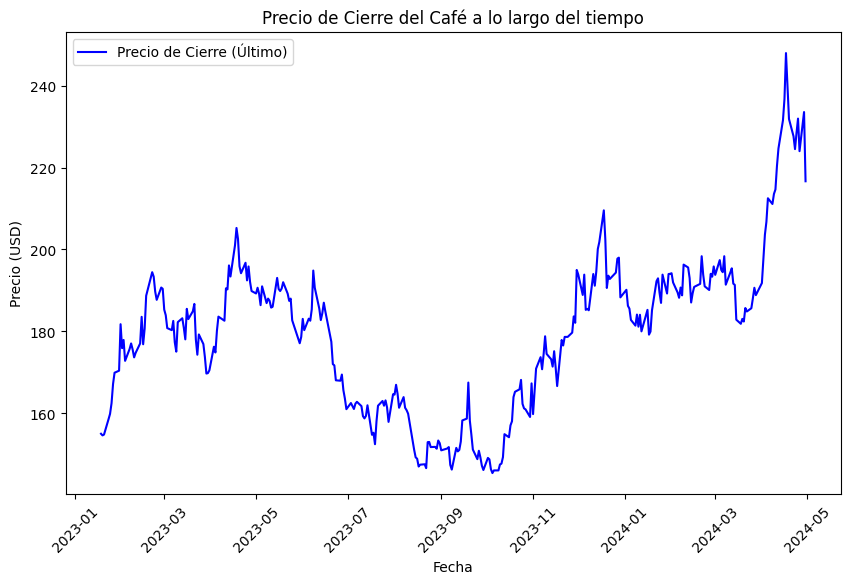

In [43]:
# Graficar el precio de cierre ('Último') a lo largo del tiempo
plt.figure(figsize=(10, 6))
plt.plot(coffee_data['Fecha'], coffee_data['Último'], label='Precio de Cierre (Último)', color='blue')
plt.title('Precio de Cierre del Café a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Precio (USD)')
plt.xticks(rotation=45)
plt.legend()
plt.show()

- En la primera mitad de 2023, los precios mostraron un patrón de alza, con picos que alcanzan alrededor de 200 USD, seguido de una caída pronunciada hacia los meses de julio y agosto.

- A partir de agosto de 2023, los precios comienzan a mostrar una tendencia más estable, aunque ligeramente ascendente, hasta noviembre.

- En los meses siguientes, hasta principios de 2024, observamos una subida consistente de los precios del café, alcanzando un pico muy pronunciado en torno a los 240 USD en marzo o abril de 2024.

- Posteriormente, hay una ligera caída a finales de abril y principios de mayo de 2024.

- El gráfico sugiere la existencia de varios ciclos de precios del café, con aumentos, caídas y nuevos aumentos. Esta dinámica refleja los cambios en la oferta y demanda del mercado, las condiciones climáticas que afectan la producción, las variaciones en el consumo global, y otros factores como la geopolítica y el comercio internacional.

¿Por que nos quedamos con el precio de cierre?

El precio de cierre es generalmente el último precio negociado de un activo al final del día de mercado. Este precio es considerado como el más representativo de la sesión, ya que refleja el acuerdo final entre compradores y vendedores después de que el mercado ha absorbido toda la información disponible a lo largo del día

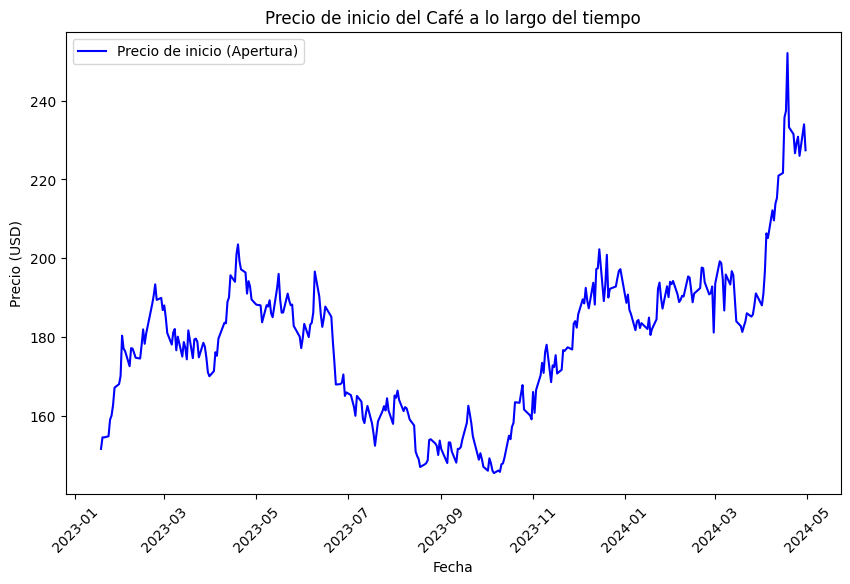

In [44]:
# Graficar el precio de cierre (' Apertura') a lo largo del tiempo
plt.figure(figsize=(10, 6))
plt.plot(coffee_data['Fecha'], coffee_data['Apertura'], label='Precio de inicio (Apertura)', color='blue')
plt.title('Precio de inicio del Café a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Precio (USD)')
plt.xticks(rotation=45)
plt.legend()
plt.show()

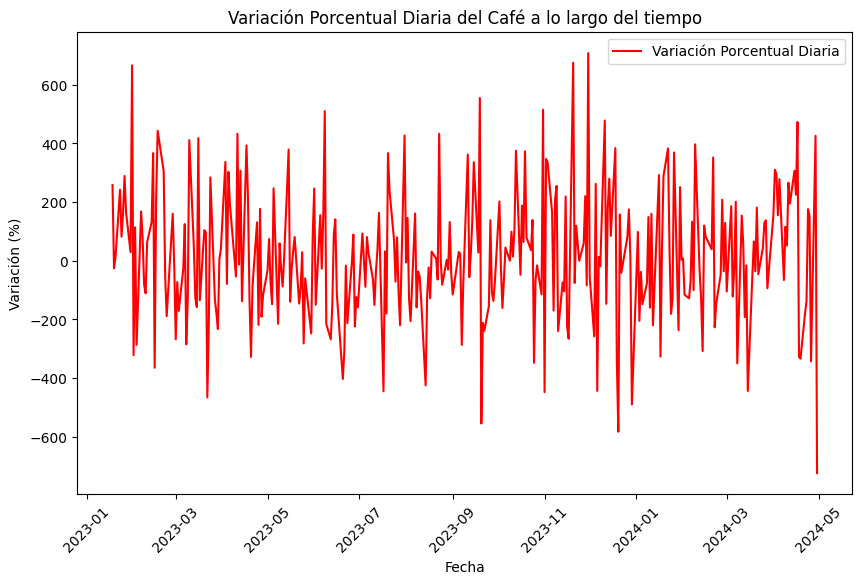

In [45]:
# Graficar la variación porcentual diaria ('% var.') a lo largo del tiempo
plt.figure(figsize=(10, 6))
plt.plot(coffee_data['Fecha'], coffee_data['% var.'], label='Variación Porcentual Diaria', color='red')
plt.title('Variación Porcentual Diaria del Café a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Variación (%)')
plt.xticks(rotation=45)
plt.legend()
plt.show()


- La gráfica muestra una gran cantidad de variaciones bruscas a lo largo del tiempo, tanto positivas como negativas. Esto indica que el precio del café experimenta cambios significativos en muchos días, lo que sugiere que es un mercado volátil.

- Se observan picos de más de 600% y caídas de casi -600%, lo cual sugiere que en ciertos días hubo eventos o factores que causaron fluctuaciones extremas en el precio del café.

- A lo largo del gráfico, las variaciones porcentuales muestran una tendencia a oscilar alrededor del 0%. Esto es típico en mercados volátiles, donde los precios suben y bajan de manera regular, pero el comportamiento extremo de algunas de estas oscilaciones es notable.

- Algunos picos de volatilidad pueden estar asociados con eventos globales o factores específicos del mercado del café, como cambios en la oferta, condiciones climáticas, políticas agrícolas, o fluctuaciones en la demanda global.

In [46]:
# Ordenar los datos por fecha
coffee_data['Fecha'] = pd.to_datetime(coffee_data['Fecha'], format='%d.%m.%Y')
coffee_data = coffee_data.sort_values(by='Fecha')

In [47]:
# Calcular los retornos logarítmicos
prices = coffee_data['Último'].values
log_returns = np.diff(np.log(prices)) * 100  # Retornos en %

El retorno logarítmico es una medida utilizada en finanzas para expresar el cambio porcentual de un precio de un día a otro de manera que sea más fácil de interpretar y trabajar en modelos:

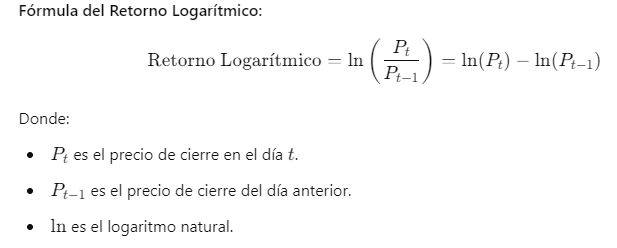



Ventajas de los Retornos Logarítmicos:
1. Simplicidad en Cálculos: Los retornos logarítmicos son aditivos, lo que simplifica los cálculos cuando se suman o promedian rendimientos a lo largo del tiempo.
2. Independencia del Tamaño del Cambio: Los retornos logarítmicos hacen que el análisis sea menos sensible a grandes cambios de precios, ya que estos se expresan en términos relativos.
3. Normalidad de los Datos: Los retornos logarítmicos tienden a ser más normales que los retornos simples, lo cual es útil para muchos modelos financieros que suponen normalidad en las distribuciones de datos.
Simetría: Los retornos logarítmicos tratan de manera simétrica los aumentos y disminuciones de precio, lo que facilita el análisis de datos financieros.

In [48]:
# Calcular la media y desviación estándar de los retornos
mean_returns = np.mean(log_returns)
std_returns = np.std(log_returns)

# Definir los thresholds usando la desviación estándar
threshold_very_up = mean_returns + std_returns      # Muy alcista
threshold_up = mean_returns + 0.5 * std_returns     # Alcista
threshold_down = mean_returns - 0.5 * std_returns   # Bajista
threshold_very_down = mean_returns - std_returns

# Inicializar la lista de estados reales
states = []

# Clasificar los retornos logarítmicos en 5 estados
for ret in log_returns:
    if ret > threshold_very_up:
        states.append(1)  # Muy alcista
    elif ret > threshold_up:
        states.append(2)  # Alcista
    elif ret > threshold_down:
        states.append(3)  # Estable
    elif ret > threshold_very_down:
        states.append(4)  # Bajista
    else:
        states.append(5)  # Muy bajista

states_real = np.array(states)


n_states = 5
transitions = np.zeros((n_states, n_states))  # Matriz vacía de 5x5 para las transiciones

# Contar las transiciones entre estados
for i in range(1, len(states)):
    prev_state = states[i - 1] - 1  # Estado anterior
    current_state = states[i] - 1   # Estado actual
    transitions[prev_state, current_state] += 1

# Convertir las frecuencias en probabilidades de transición
matriz_transicion_5_estados = transitions / transitions.sum(axis=1, keepdims=True)


print("Matriz de transición para 5 estados:")
print(matriz_transicion_5_estados)

Matriz de transición para 5 estados:
[[0.09803922 0.1372549  0.37254902 0.11764706 0.2745098 ]
 [0.23404255 0.04255319 0.34042553 0.21276596 0.17021277]
 [0.16260163 0.18699187 0.3902439  0.17073171 0.08943089]
 [0.14545455 0.18181818 0.38181818 0.18181818 0.10909091]
 [0.15555556 0.11111111 0.4        0.17777778 0.15555556]]


¿Cómo se calcula la matriz de transición?

1. Identificar los estados:

- Muy alcista (Estado 1): El mercado está en un estado de fuerte crecimiento, con retornos muy positivos..
- Alcista (Estado 2): El mercado está creciendo, pero no de manera tan extrema.
- Estable (Estado 3): El mercado está en un período de estabilidad, con retornos moderados o casi nulos.
- Bajista (Estado 4): El mercado está decreciendo, pero no de manera muy pronunciada.
- Muy bajista (Estado 5): El mercado está en una fuerte caída, con retornos muy negativos.

Clasificamos cada día en uno de estos estados basándonos en los retornos logarítmicos.

Primero, se calcula la media y la desviación estándar de los retornos logarítmicos (log_returns), lo que da una idea de la tendencia central y la dispersión de los retornos.

Luego, se definen umbrales (thresholds) en función de la desviación estándar:

- Muy alcista (Estado 1): Si el retorno es mayor que la media + una desviación estándar.
- Alcista (Estado 2): Si el retorno es mayor que la media + 0.5 veces la desviación estándar.
- Estable (Estado 3): Si el retorno está entre media - 0.5 veces la desviación estándar y media + 0.5 veces la desviación estándar.
- Bajista (Estado 4): Si el retorno es menor que la media - 0.5 veces la desviación estándar.
- Muy bajista (Estado 5): Si el retorno es menor que la media - una desviación estándar.

Estos umbrales basados en la desviación estándar permiten dividir los retornos en categorías que reflejan si el mercado está en una fase de alta volatilidad positiva (muy alcista) o negativa (muy bajista), o si está relativamente estable.

2. Clasificacion de retornos

- Cada día se clasifica según su retorno logarítmico en uno de los cinco estados.

- Si el retorno de un día está por encima de la media + una desviación estándar, ese día se clasifica como "muy alcista". Si el retorno está por debajo de la media - una desviación estándar, ese día se clasifica como "muy bajista". Este proceso se repite para cada día de los datos históricos.

3. Conteo de transiciones

- Una vez que todos los días han sido clasificados en uno de los cinco estados, se analizan las transiciones entre días consecutivos.

- Por ejemplo, si el mercado pasa de un estado muy alcista en el día 1 a un estado estable en el día 2, esto se registra como una transición del estado 1 a 3.

- La frecuencia de todas estas transiciones se almacena en una matriz llamada matriz de transición. Cada fila de la matriz corresponde al estado inicial, y cada columna al estado final.

4. Calculo de probabilidades

 Luego, se convierte esta matriz de frecuencias en una matriz de probabilidades dividiendo cada fila por el total de transiciones que salen de ese estado.

 Por ejemplo, si en 100 días el mercado ha estado en el estado alcista y ha pasado 20 veces al estado muy alcista, la probabilidad de pasar del estado alcista al estado muy alcista sería 20/100 o 0.2



Ahora explicaremos la matriz de transición:

\begin{bmatrix}
0.09803922 & 0.1372549  & 0.37254902 & 0.11764706 & 0.2745098  \\
0.23404255 & 0.04255319 & 0.34042553 & 0.21276596 & 0.17021277 \\
0.16260163 & 0.18699187 & 0.3902439  & 0.17073171 & 0.08943089 \\
0.14545455 & 0.18181818 & 0.38181818 & 0.18181818 & 0.10909091 \\
0.15555556 & 0.11111111 & 0.4        & 0.17777778 & 0.15555556
\end{bmatrix}

Cada fila de la matriz representa el estado actual del mercado, y cada columna representa el estado al día siguiente:

Donde:

- Primera fila: Estado muy alcista hoy.
- Segunda fila: Estado alcista hoy.
- Tercera fila: Estado estable hoy.
- Cuarta fila: Estado bajista hoy
- Quinta fila: Estado muy bajista hoy.

Cada valor de la matriz te da la probabilidad de que, estando en un estado hoy, el mercado pase a un estado diferente o permanezca en el mismo estado mañana.

Interpretación:
1. Fila 1 (Estado Muy Alcista Hoy):

- 0.0980: Hay un 9.80% de probabilidad de que el mercado permanezca muy alcista al día siguiente.
- 0.1373: Hay un 13.73% de probabilidad de que el mercado pase a un estado alcista al día siguiente.
- 0.3725: Hay un 37.25% de probabilidad de que el mercado pase a un estado estable al día siguiente.
- 0.1176: Hay un 11.76% de probabilidad de que el mercado pase a un estado bajista al día siguiente.
- 0.2745: Hay un 27.45% de probabilidad de que el mercado pase a un estado muy bajista al día siguiente.


2. Fila 2 (Estado Alcista Hoy):

- 0.2340: Hay un 23.40% de probabilidad de que el mercado pase a un estado muy alcista al día siguiente
- 0.0426: Hay un 4.26% de probabilidad de que el mercado permanezca alcista al día siguiente.
- 0.3404: Hay un 34.04% de probabilidad de que el mercado pase a un estado estable al día siguiente.
- 0.2128: Hay un 21.28% de probabilidad de que el mercado pase a un estado bajista al día siguiente.
- 0.1702: Hay un 17.02% de probabilidad de que el mercado pase a un estado muy bajista al día siguiente.


3. Fila 3 (Estado Estable Hoy):

- 0.1626: Hay un 16.26% de probabilidad de que el mercado pase a un estado muy alcista al día siguiente.
- 0.1870: Hay un 18.70% de probabilidad de que el mercado pase a un estado alcista al día siguiente.
- 0.3902: Hay un 39.02% de probabilidad de que el mercado permanezca estable al día siguiente.
- 0.1707: Hay un 17.07% de probabilidad de que el mercado pase a un estado bajista al día siguiente.
- 0.0894: Hay un 8.94% de probabilidad de que el mercado pase a un estado muy bajista al día siguiente.

4. Fila 4 (Estado Bajista Hoy):
- 0.1455: Hay un 14.55% de probabilidad de que el mercado pase a un estado muy alcista al día siguiente.
- 0.1818: Hay un 18.18% de probabilidad de que el mercado pase a un estado alcista al día siguiente.
- 0.3818: Hay un 38.18% de probabilidad de que el mercado pase a un estado estable al día siguiente.
- 0.1818: Hay un 18.18% de probabilidad de que el mercado permanezca bajista al día siguiente.
- 0.1091: Hay un 10.91% de probabilidad de que el mercado pase a un estado muy bajista al día siguiente.

5. Fila 5 (Estado Muy Bajista Hoy):
- 0.1556: Hay un 15.56% de probabilidad de que el mercado pase a un estado muy alcista al día siguiente.
- 0.1111: Hay un 11.11% de probabilidad de que el mercado pase a un estado alcista al día siguiente.
- 0.4000: Hay un 40.00% de probabilidad de que el mercado pase a un estado estable al día siguiente.
- 0.1778: Hay un 17.78% de probabilidad de que el mercado pase a un estado bajista al día siguiente.
- 0.1556: Hay un 15.56% de probabilidad de que el mercado permanezca muy bajista al día siguiente.

# Modelo MS-GARCH

La cadena de Markov que calculamos antes a través de la matriz de transición tiene como objetivo capturar los cambios de estado del mercado de un día al siguiente. Los estados del mercado que definimos fueron:

- Estado Alcista (1): El mercado está en una tendencia de subida.
- Estado Bajista (2): El mercado está en una tendencia de bajada.
- Estado Estable (3): El mercado está en una fase de poca volatilidad o estabilidad.
- Estado Bajista (4): El mercado está en una tendencia de bajada moderada.
- Estado Muy Bajista (5): El mercado está en una tendencia de bajada fuerte.

El modelo GARCH se utiliza para modelar la volatilidad condicional de los retornos del precio. Dentro de cada estado de la cadena de Markov, la volatilidad de los precios puede cambiar a lo largo del tiempo. El GARCH modela la volatilidad dependiendo de los datos de volatilidad pasada y los shocks recientes en los precios.

Basicamente el flujo de prediccion se puede ver de la siguiente forma:

1. Predicción del Estado del Mercado:

- La cadena de Markov predice el estado del mercado (muy alcista, alcista, estable, bajista o muy bajista) para el siguiente día.
- Esto se basa en el estado actual y la matriz de transición, que refleja las probabilidades de moverse de un estado a otro.
- Por ejemplo, si hoy el mercado está en un estado muy alcista, la matriz de transición nos dice la probabilidad de que el mercado siga muy alcista, o pase a alcista, estable, bajista o muy bajista al día siguiente.

2. Aplicación del Modelo GARCH:

Dependiendo del estado predicho por la cadena de Markov, aplicamos un modelo GARCH específico para ese estado. Cada estado tiene su propio comportamiento de volatilidad, por lo que ajustamos el GARCH para capturar cómo se comporta la volatilidad en cada estado:

- En un estado muy alcista, los retornos son más grandes y la volatilidad tiende a ser mayor.
- En un estado estable, la volatilidad es más baja y los movimientos de precios son menos bruscos.
- En un estado muy bajista, la volatilidad puede ser extremadamente alta, debido a fuertes caídas en los precios.

El modelo GARCH ajusta la volatilidad condicional en función de la varianza pasada y los shocks recientes (retornos inesperados). Esto permite que el modelo capte la volatilidad dentro de cada estado específico del mercado.

3. Flujo del modelo MS-GARCH

Supongamos que el mercado hoy está en un estado bajista (Estado 4), la cadena de Markov nos dice que hay una probabilidad del 18.18% de que el mercado permanezca bajista al día siguiente, pero también una probabilidad del 38.18% de que pase a un estado estable. Usamos esta probabilidad para simular qué estado es más probable que ocurra al día siguiente.

- Si el mercado se mantiene en un estado bajista (Estado 4), aplicamos un modelo GARCH ajustado para capturar la volatilidad típica de los mercados en tendencia bajista. Este modelo predice la volatilidad basada en la volatilidad y los shocks recientes en ese estado.

- Si el mercado pasa al estado estable (Estado 3), usamos un modelo GARCH con menor volatilidad, ya que los mercados estables tienden a tener menos fluctuaciones en los precios.







In [49]:
prices = coffee_data['Último'].values
log_returns = np.diff(np.log(prices)) * 100


states = np.array(states)


muy_alcista_returns = log_returns[states == 1]
alcista_returns = log_returns[states == 2]
estable_returns = log_returns[states == 3]
bajista_returns = log_returns[states == 4]
muy_bajista_returns = log_returns[states_real == 5]

# Ajustar un modelo GARCH para cada estado

# Modelo GARCH para estado muy alcista
garch_model_muy_alcista = arch_model(muy_alcista_returns, vol='Garch', p=1, q=1)
garch_fit_muy_alcista = garch_model_muy_alcista.fit(disp='off')

# Modelo GARCH para estado alcista
garch_model_alcista = arch_model(alcista_returns, vol='Garch', p=1, q=1)
garch_fit_alcista = garch_model_alcista.fit(disp='off')

# Modelo GARCH para estado estable
garch_model_estable = arch_model(estable_returns, vol='Garch', p=1, q=1)
garch_fit_estable = garch_model_estable.fit(disp='off')

# Modelo GARCH para estado bajista
garch_model_bajista = arch_model(bajista_returns, vol='Garch', p=1, q=1)
garch_fit_bajista = garch_model_bajista.fit(disp='off')

# Modelo GARCH para estado muy bajista
garch_model_muy_bajista = arch_model(muy_bajista_returns, vol='Garch', p=1, q=1)
garch_fit_muy_bajista = garch_model_muy_bajista.fit(disp='off')


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.07773. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.08055. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [50]:
print("\nModelo GARCH para estado estable:")
print(garch_fit_estable)


Modelo GARCH para estado estable:
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -113.212
Distribution:                  Normal   AIC:                           234.423
Method:            Maximum Likelihood   BIC:                           245.672
                                        No. Observations:                  123
Date:                Fri, Sep 20 2024   Df Residuals:                      122
Time:                        17:39:37   Df Model:                            1
                                 Mean Model                                
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0220  5.5

# Backtest

In [51]:
# Cargar los datos históricos del café
file_path = '/content/backtest.csv'
backtest = pd.read_csv(file_path)

In [52]:

numeric_columns = ['Último', 'Apertura', 'Máximo', 'Mínimo']

for col in numeric_columns:
    backtest[col] = backtest[col].str.replace(',', '.').astype(float)


backtest['Vol.'] = backtest['Vol.'].str.replace('K','0').str.replace(',','').astype(float)


backtest['% var.'] = backtest['% var.'].str.replace('%','').str.replace(',','').astype(float)



backtest['Fecha'] = pd.to_datetime(backtest['Fecha'], format='%d.%m.%Y')

In [53]:

prices = backtest['Último'].values


log_returns = np.diff(np.log(prices)) * 100


threshold_very_up = mean_returns + std_returns
threshold_up = mean_returns + 0.5 * std_returns
threshold_down = mean_returns - 0.5 * std_returns
threshold_very_down = mean_returns - std_returns

# Inicializar la lista de estados reales
states_real = []

# Clasificar los retornos logarítmicos en 5 estados
for ret in log_returns:
    if ret > threshold_very_up:
        states_real.append(1)  # Muy alcista
    elif ret > threshold_up:
        states_real.append(2)  # Alcista
    elif ret > threshold_down:
        states_real.append(3)  # Estable
    elif ret > threshold_very_down:
        states_real.append(4)  # Bajista
    else:
        states_real.append(5)  # Muy bajista


states_real = np.array(states_real)

matriz_transicion = np.array([
    [0.09803922 ,0.1372549,  0.37254902, 0.11764706, 0.2745098],  # Transiciones desde estado muy alcista
    [0.23404255, 0.04255319, 0.34042553, 0.21276596, 0.17021277],  # Transiciones desde estado alcista
    [0.16260163, 0.18699187, 0.3902439,  0.17073171, 0.08943089],  # Transiciones desde estado estable
    [0.14545455, 0.18181818, 0.38181818, 0.18181818, 0.10909091],  # Transiciones desde estado bajista
    [0.15555556, 0.11111111, 0.4,      0.17777778 ,0.15555556]   # Transiciones desde estado muy bajista
])

matriz_transicion = matriz_transicion / matriz_transicion.sum(axis=1, keepdims=True)  # Normalizar filas


# Función para predecir el próximo precio basado en el estado y la volatilidad
def predict_price(current_price, state, volatility_factor=0.5):
    if state == 1:  # Muy alcista
        forecast = garch_fit_muy_alcista.forecast(horizon=1)
        predicted_volatility = np.sqrt(forecast.variance.values[-1][0]) #* volatility_factor
    elif state == 2:  # Alcista
        forecast = garch_fit_alcista.forecast(horizon=1)
        predicted_volatility = np.sqrt(forecast.variance.values[-1][0]) #* volatility_factor
    elif state == 3:  # Estable
        forecast = garch_fit_estable.forecast(horizon=1)
        predicted_volatility = np.sqrt(forecast.variance.values[-1][0]) #* volatility_factor
    elif state == 4:  # Bajista
        forecast = garch_fit_bajista.forecast(horizon=1)
        predicted_volatility = np.sqrt(forecast.variance.values[-1][0]) #* volatility_factor
    else:  # Muy bajista
        forecast = garch_fit_muy_bajista.forecast(horizon=1)
        predicted_volatility = np.sqrt(forecast.variance.values[-1][0]) #* volatility_factor

    # Predicción del precio utilizando la volatilidad predicha
    predicted_price = current_price * np.exp(predicted_volatility / 100)
    return predicted_price

predicted_prices = []
predicted_states = []

# Estado inicial
estado_actual = states_real[0]

# Realizar el backtest
for i in range(1, len(prices)):
    precio_actual = prices[i-1]

    # Predecir el estado del mercado para el día siguiente
    probabilidades_estado = matriz_transicion[estado_actual - 1]  # Probabilidades para el estado actual
    estado_predicho = np.random.choice([1, 2, 3, 4, 5], p=probabilidades_estado)
    predicted_states.append(estado_predicho)

    # Predecir el próximo precio basado en el estado predicho (usando los modelos ya ajustados)
    precio_predicho = predict_price(precio_actual, estado_predicho, volatility_factor=0.2)
    predicted_prices.append(precio_predicho)

    # Actualizar el estado actual para el próximo ciclo
    estado_actual = estado_predicho


backtest_results = pd.DataFrame({
    'Fecha': backtest['Fecha'][1:],
    'Precio Real': backtest['Último'][1:],
    'Precio Predicho': predicted_prices,
    'Estado Real': states_real,
    'Estado Predicho': predicted_states
})

# Mostrar las primeras filas del resultado del backtest
print(backtest_results.head())


       Fecha  Precio Real  Precio Predicho  Estado Real  Estado Predicho
1 2024-08-29       251.80       248.890794            2                4
2 2024-08-28       260.45       255.360257            1                5
3 2024-08-27       259.40       261.076730            3                2
4 2024-08-26       253.65       261.805772            5                1
5 2024-08-23       251.20       255.195431            3                3


In [54]:
backtest_results.head()

,Fecha,Precio Real,Precio Predicho,Estado Real,Estado Predicho
1,2024-08-29,251.80,248.890794,2,4
2,2024-08-28,260.45,255.360257,1,5
3,2024-08-27,259.40,261.076730,3,2
4,2024-08-26,253.65,261.805772,5,1
5,2024-08-23,251.20,255.195431,3,3


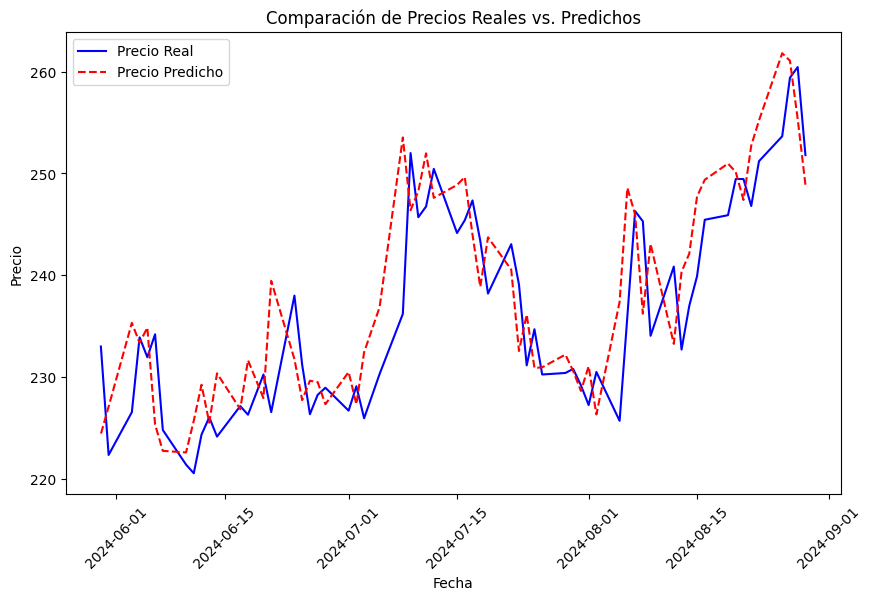

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(backtest_results['Fecha'], backtest_results['Precio Real'], label='Precio Real', color='blue')
plt.plot(backtest_results['Fecha'], backtest_results['Precio Predicho'], label='Precio Predicho', color='red', linestyle='dashed')
plt.title('Comparación de Precios Reales vs. Predichos')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.xticks(rotation=45)
plt.legend()
plt.show()


# Predicciones por parte del usuario

In [68]:
import numpy as np
from arch import arch_model

# Definir una función para el modelo MS-GARCH
def predict_price_and_state(current_price, log_returns, matriz_transicion, garch_fits, volatility_factor=0.5):
    """
    Predice el próximo precio del café y el estado del mercado basado en el precio actual y los retornos previos.

    :param current_price: Precio actual del café.
    :param log_returns: Retornos logarítmicos recientes del mercado (históricos).
    :param matriz_transicion: Matriz de transición de los estados del mercado.
    :param garch_fits: Lista de modelos GARCH ajustados para cada estado.
    :param volatility_factor: Factor de volatilidad para ajustar el precio predicho.
    :return: Precio predicho y estado predicho.
    """
    mean_returns = np.mean(log_returns)
    std_returns = np.std(log_returns)

    threshold_very_up = mean_returns + std_returns
    threshold_up = mean_returns + 0.5 * std_returns
    threshold_down = mean_returns - 0.5 * std_returns
    threshold_very_down = mean_returns - std_returns

    # Determinar el estado actual en función del último retorno logarítmico
    last_return = log_returns[-1]
    if last_return > threshold_very_up:
        current_state = 1  # Muy Alcista
    elif last_return > threshold_up:
        current_state = 2  # Alcista
    elif last_return > threshold_down:
        current_state = 3  # Estable
    elif last_return > threshold_very_down:
        current_state = 4  # Bajista
    else:
        current_state = 5  # Muy Bajista

    # Predecir el próximo estado del mercado basado en la matriz de transición
    probabilidades_estado = matriz_transicion[current_state - 1]
    estado_predicho = np.random.choice([1, 2, 3, 4, 5], p=probabilidades_estado)

    forecast = garch_fits[estado_predicho - 1].forecast(horizon=1)
    predicted_volatility = np.sqrt(forecast.variance.values[-1][0]) * volatility_factor


    if estado_predicho in [1, 2]:  # Muy Alcista o Alcista, el precio tiende a subir
        price_direction = 1
    elif estado_predicho in [4, 5]:  # Bajista o Muy Bajista, el precio tiende a bajar
        price_direction = -1
    else:
        price_direction = np.random.choice([-1, 1])


    predicted_price = current_price * np.exp(price_direction * predicted_volatility / 100)

    return predicted_price, current_state, estado_predicho

# Modelos GARCH para cada estado
garch_fits = [garch_fit_muy_alcista, garch_fit_alcista, garch_fit_estable, garch_fit_bajista, garch_fit_muy_bajista]


matriz_transicion = np.array([
    [0.09803922, 0.1372549, 0.37254902, 0.11764706, 0.2745098],
    [0.23404255, 0.04255319, 0.34042553, 0.21276596, 0.17021277],
    [0.16260163, 0.18699187, 0.3902439, 0.17073171, 0.08943089],
    [0.14545455, 0.18181818, 0.38181818, 0.18181818, 0.10909091],
    [0.15555556, 0.11111111, 0.4, 0.17777778, 0.15555556]
])

#### INPUT USUARIO
current_price = float(input("Ingrese el precio actual del café: "))
n_dias = int(input("Ingrese el número de días a predecir: "))


predicted_prices = []
predicted_states = []


for dia in range(n_dias):

    predicted_price, current_state, predicted_state = predict_price_and_state(current_price, log_returns, matriz_transicion, garch_fits)

    # Almacenar la predicción
    predicted_prices.append(predicted_price)
    predicted_states.append(predicted_state)

    # Usar la predicción como el precio actual para la siguiente predicción
    current_price = predicted_price

# Mostrar las predicciones para los n días
estados_mercado = {
    1: "Muy Alcista",
    2: "Alcista",
    3: "Estable",
    4: "Bajista",
    5: "Muy Bajista"
}

for dia in range(n_dias):
    print(f"Día {dia + 1}: Precio Predicho = {predicted_prices[dia]:.2f} USD, Estado Predicho = {estados_mercado[predicted_states[dia]]}")


Ingrese el precio actual del café: 263
Ingrese el número de días a predecir: 30
Día 1: Precio Predicho = 264.22 USD, Estado Predicho = Muy Alcista
Día 2: Precio Predicho = 263.85 USD, Estado Predicho = Bajista
Día 3: Precio Predicho = 264.65 USD, Estado Predicho = Estable
Día 4: Precio Predicho = 263.85 USD, Estado Predicho = Estable
Día 5: Precio Predicho = 264.17 USD, Estado Predicho = Alcista
Día 6: Precio Predicho = 263.80 USD, Estado Predicho = Bajista
Día 7: Precio Predicho = 264.12 USD, Estado Predicho = Alcista
Día 8: Precio Predicho = 264.92 USD, Estado Predicho = Estable
Día 9: Precio Predicho = 265.73 USD, Estado Predicho = Estable
Día 10: Precio Predicho = 266.53 USD, Estado Predicho = Estable
Día 11: Precio Predicho = 267.35 USD, Estado Predicho = Estable
Día 12: Precio Predicho = 265.48 USD, Estado Predicho = Muy Bajista
Día 13: Precio Predicho = 265.79 USD, Estado Predicho = Alcista
Día 14: Precio Predicho = 263.94 USD, Estado Predicho = Muy Bajista
Día 15: Precio Predic